<a href="https://colab.research.google.com/github/steflhermitte/EO-Notebooks/blob/master/RemoteSensing%2BBigData/RSBD_Notebook2_SolutionExercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solution to exercises of week 1.3

## Package installation

In [43]:
import cartopy.crs as ccrs
import cartopy
import folium
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
import pandas as pd
from geemap import cartoee
import geemap
import ee
import cartopy.crs as ccrs
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 12] # to make the default figures larger


In [20]:
%pylab inline
ee.Authenticate()
ee.Initialize()

Populating the interactive namespace from numpy and matplotlib
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=B8wFR3i53tvFmt8qLXC5gjaCoJjZoVwGzQmF6azeAVI&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWgRaFG6QaeKYfmPov2U683_bRogaHO4tOlfgtvFRTbAZb8jYWKTr_c

Successfully saved authorization token.


## Q1: cartopy/cartoee
Make a map (with scalebar) using cartopy/cartoee with the
following layers:
 * the PDOK airborne imagery over the Netherlands
 * the MODIS Aqua surface reflectance (using WMS)
 * a red dot over your home
 * the AHN elevation data set (using GEE)

 

### Q1.1 & Q1.3: PDOK

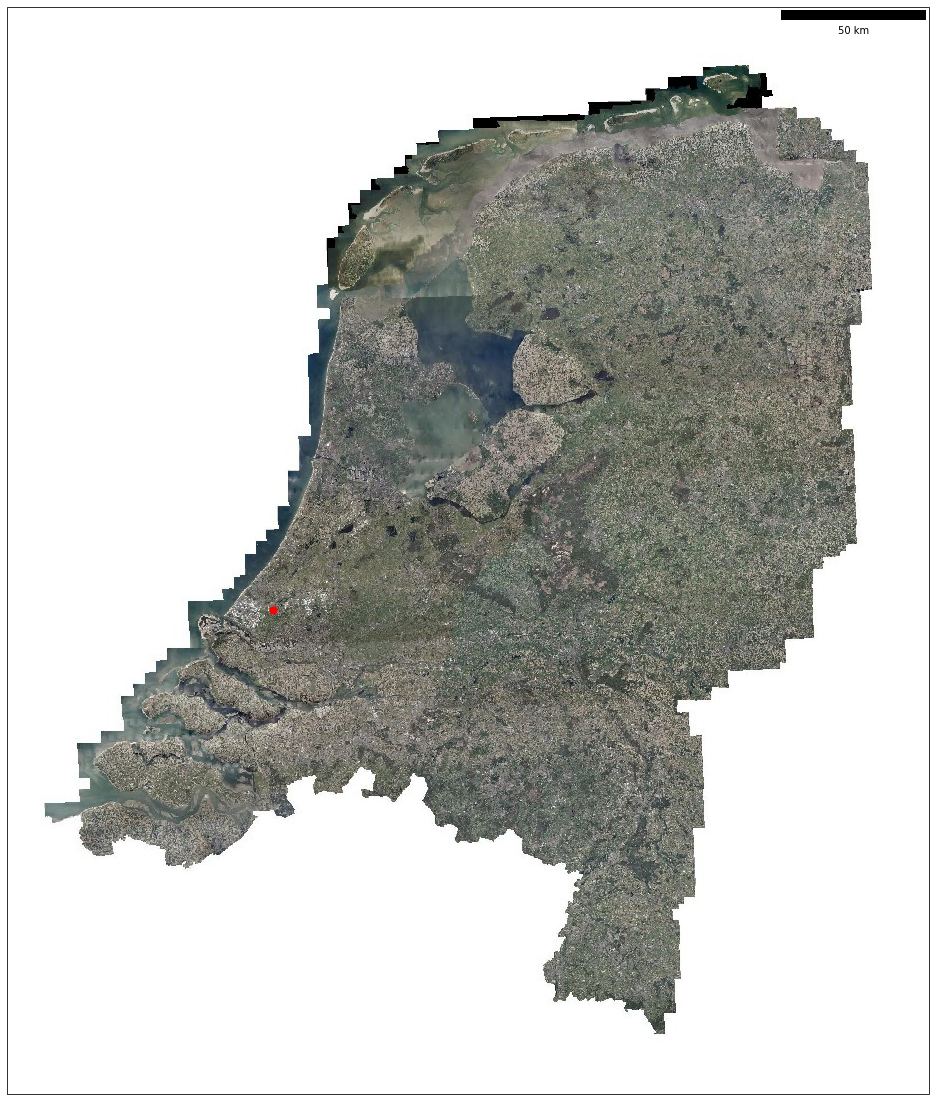

In [7]:
# Create figure
fig = plt.figure(figsize=(20, 20))
# Define projection system
crs = ccrs.epsg(32631)
# Define Netherlands extent
extent = [3, 7.5, 50.5, 53.8] # with (x0, x1, y0, y1) of the map in the given coordinate system.
# Create plot
ax = plt.axes(projection=crs)
# Set extent
ax.set_extent(extent)
# Add PDOK WMS
ax.add_wms(wms='https://service.pdok.nl/hwh/luchtfotorgb/wms/v1_0',layers=['Actueel_ortho25'])
# Add scalebar
scalebar = ScaleBar(1,box_alpha=0)
ax.add_artist(scalebar)
# Add red dot
ax.plot(4.34, 52, 'ro', markersize=7, transform=ccrs.Geodetic())

### Q1.2: MODIS

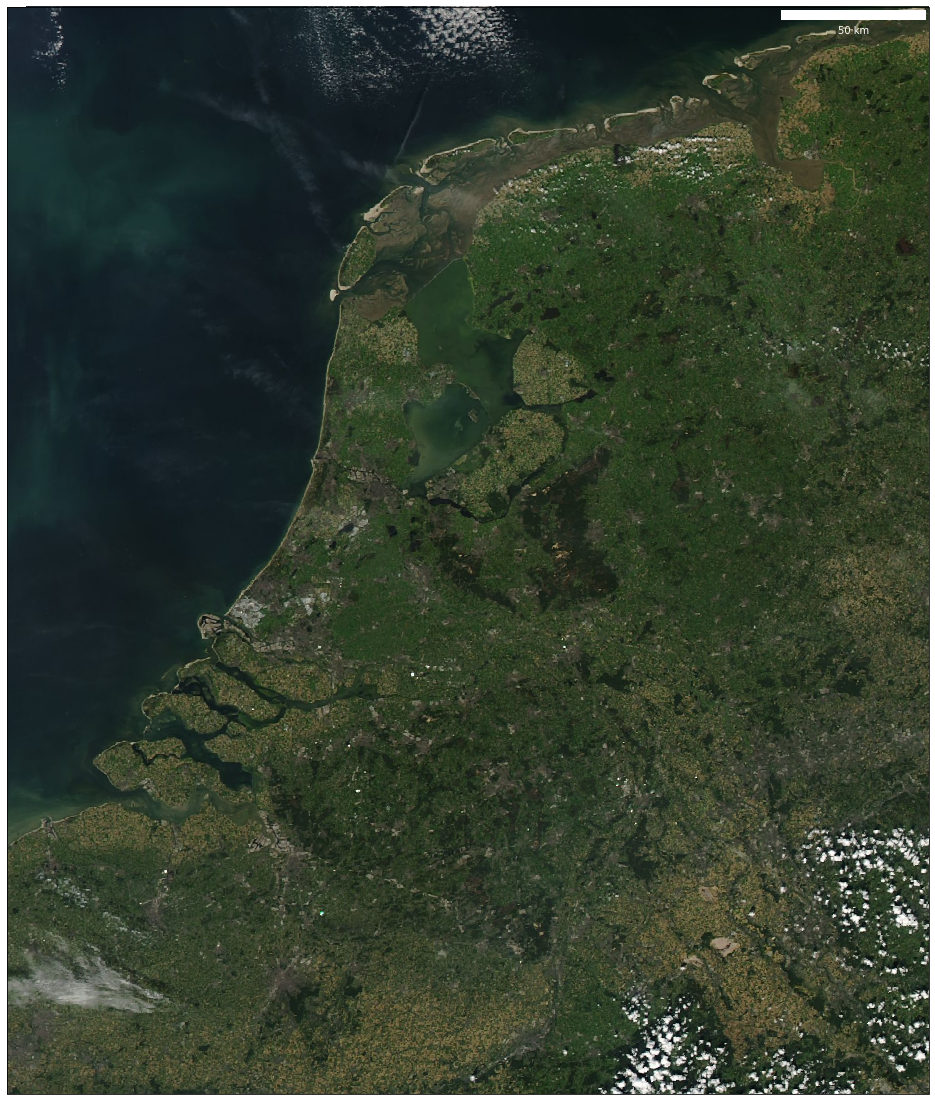

In [10]:
# Create figure
fig = plt.figure(figsize=(20, 20))
# Define projection system
crs = ccrs.epsg(32631)
# Define Netherlands extent
extent = [3, 7.5, 50.5, 53.8] # with (x0, x1, y0, y1) of the map in the given coordinate system.
# Create plot
ax = plt.axes(projection=crs)
# Set extent
ax.set_extent(extent)
# Add MODIS reflectance WMS
ax.add_wms(wms='https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi',layers=['MODIS_Aqua_CorrectedReflectance_TrueColor'],wms_kwargs={'time':'2021-09-05'})
# Add scalebar
scalebar = ScaleBar(1,box_alpha=0,color='white')
ax.add_artist(scalebar)

### Q1.4: AHN

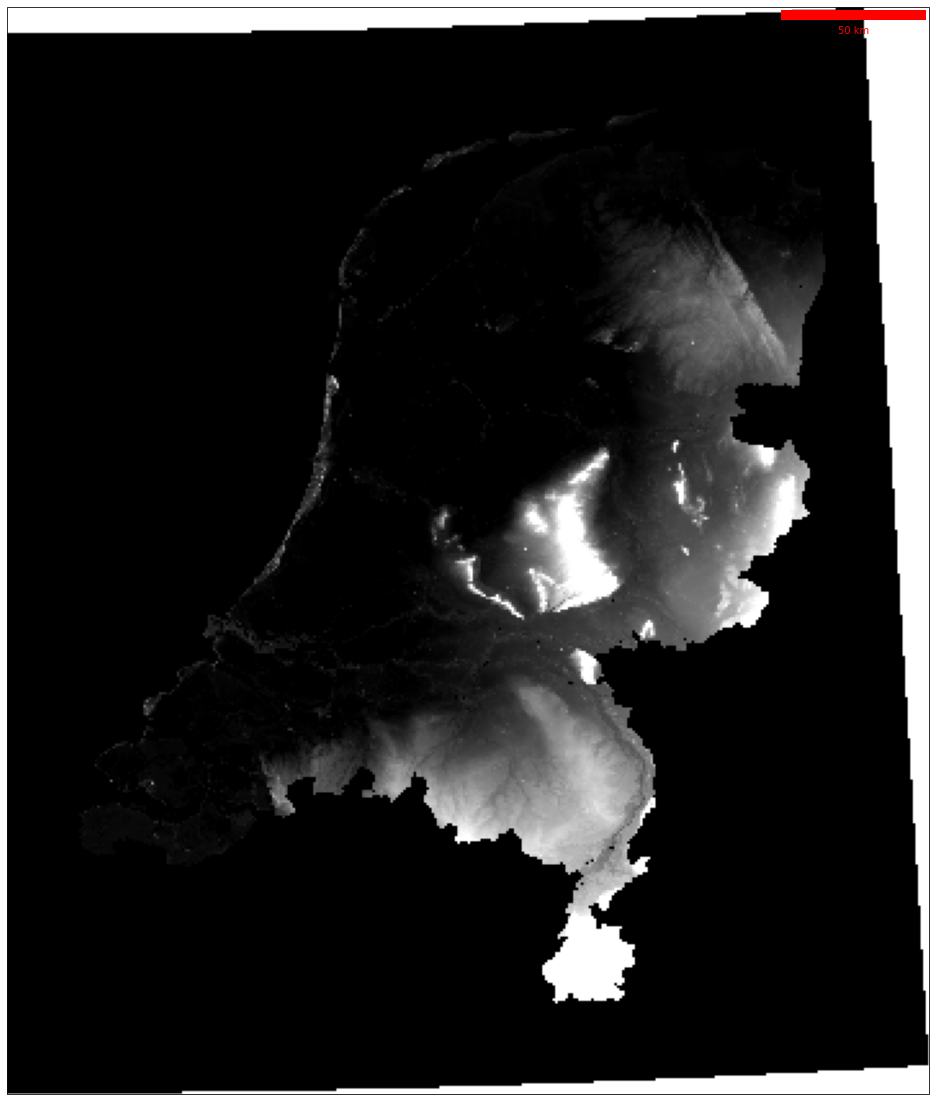

In [41]:
# Create figure
fig = plt.figure(figsize=(20, 20))

# Get data from GEE
ahn = ee.Image('AHN/AHN2_05M_INT');
# select elevation layer
elevation = ahn.select('elevation')
# Define region
region = [3,50.5,7.5,53.8]
# Define projection system
crs = ccrs.epsg(32631)
# define visualization parameters for image
vis = {'min':0,'max':40} 

# use cartoee to get a map
ax = cartoee.get_map(elevation,region=region,vis_params=vis,proj=crs)

# convert bbox coordinate from [W,S,E,N] to [W,E,S,N] as matplotlib expects
zoom_extent = cartoee.bbox_to_extent(region)

# set the extent of the map to the zoom area
ax.set_extent(zoom_extent,ccrs.PlateCarree())

# Add scalebar
scalebar = ScaleBar(1,box_alpha=0,color='red')
ax.add_artist(scalebar)


## Q2: geemap
Make a map (with scalebar) using cartopy/cartoee with the following layers:

 * the PDOK airborne imagery over the Netherlands
 *  the MODIS Aqua surface reflectance (using WMS)
 * a red dot over your home
 * the AHN elevation data set (using GEE)

### Q2.1

In [46]:
# Create Map
Map = geemap.Map()
# Add PDOK WMS
pd_url = 'https://service.pdok.nl/hwh/luchtfotorgb/wms/v1_0'
Map.add_wms_layer(url=pd_url,layers='Actueel_ortho25',name='PDOK',shown=True)
# Center and zoom on the Netherlands
Map.setCenter(lat=52,lon=5,zoom=8)
Map

### Q2.2

In [48]:
# Create Map
Map = geemap.Map()
# Add  WMS
url = 'https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi'
layers='MODIS_Aqua_CorrectedReflectance_TrueColor'
Map.add_wms_layer(url=url,layers=layers,name='MODIS',shown=True,time='2021-09-05')
# Center and zoom on the Netherlands
Map.setCenter(lat=52,lon=5,zoom=8)
Map

### Q2.3


In [50]:
# Point based on lon/lat
point = ee.Geometry.Point([4.34, 52])
# Create map
Map = geemap.Map()
# Add point to map
Map.addLayer(point, {'color':'red'},name='dot')
# Center and zoom on the Netherlands
Map.setCenter(lat=52,lon=5,zoom=8)
Map

### Q2.4

In [51]:

# Get data from GEE
ahn = ee.Image('AHN/AHN2_05M_INT');
# select elevation layer
elevation = ahn.select('elevation')
# Define region
region = [3,50.5,7.5,53.8]
# Define projection system
crs = ccrs.epsg(32631)
# define visualization parameters for image
vis = {'min':0,'max':40} 

# Create map
Map = geemap.Map()
# Add point to map
Map.addLayer(elevation, vis, name='AHN')
# Center and zoom on the Netherlands
Map.setCenter(lat=52,lon=5,zoom=8)
Map